# Quantum Simulation of Tunneling through an Eckart Barrier

In [1]:
from walsh_evolution import * 

working on iwft: 100%|██████████| 128/128 [00:00<00:00, 26041.47it/s]


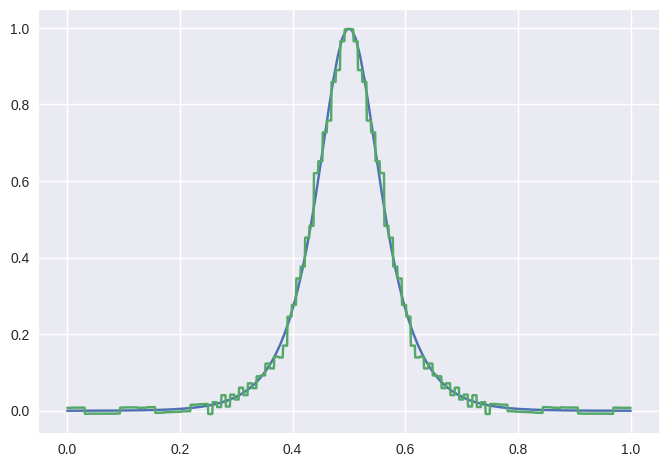

In [2]:
n = 7
N = 2**n
k_grid = np.arange(0, N, 1)
x_grid = np.linspace(0, 1, N)
repeats = 10
plot_grid = np.arange(1/(2*N*repeats), 1, 1/(N*repeats))
potential = lambda x: 1/np.cosh((x - .5)/(0.5/10))
a = wft(potential, n, x_grid)
approx = iwft(a, n, terms_kept=19)

plt.plot(x_grid, potential(x_grid), label='analytic')
plt.plot(plot_grid, np.repeat(approx, repeats))
plt.show()

working on iwft: 100%|██████████| 512/512 [00:00<00:00, 21733.24it/s]


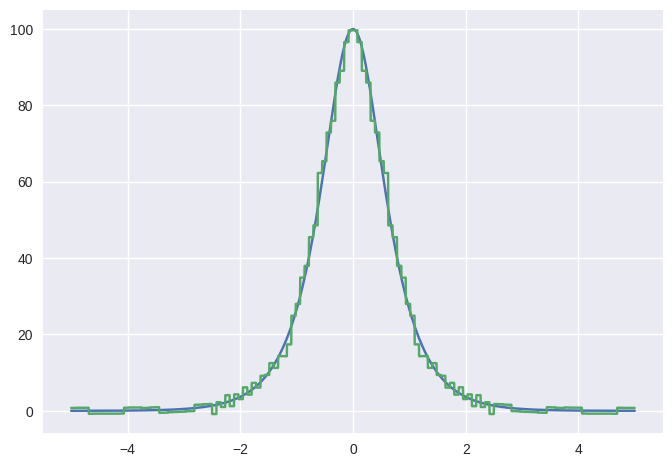

In [3]:
n = 9
N = 2**n
L = 5
k_grid = np.arange(0, N, 1)
x_grid = np.linspace(-5, 5, N)
repeats = 10
plot_grid = np.arange(-L, L, 2*L/(N*repeats))
potential = lambda x: 100/np.cosh(x/.5)
a = wft(potential, n, x_grid)
approx = iwft(a, n, terms_kept=19)
plt.plot(x_grid, potential(x_grid), label='analytic')
plt.plot(plot_grid, np.repeat(approx, repeats))
plt.show()

working on time evolution: 100%|██████████| 10000/10000 [00:01<00:00, 7952.48it/s]


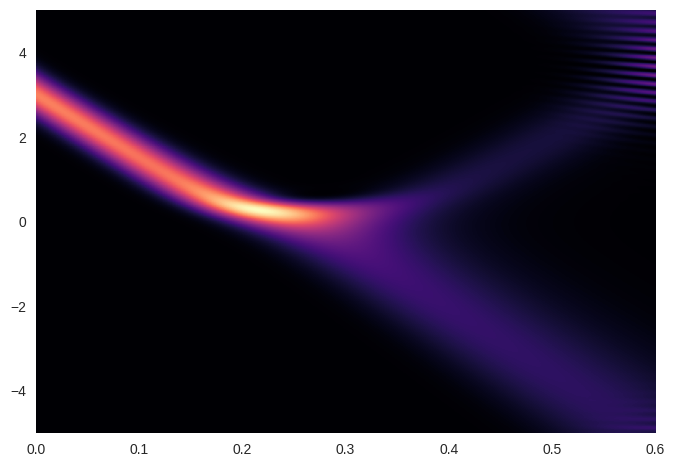

In [4]:
amplitudes, t_grid, x_grid = walsh_evolve_classical(10, 10000, terms_kept=None)
plot_time_evolution(amplitudes, t_grid, x_grid)

In [5]:
n_true = 14
true = walsh_evolve_classical(n_true, 20000)[0][-1, :]
final_waves = []

n_vals, K_vals = [7, 8, 9, 10, 11, 12, 13], [2500, 5000, 7500, 10000, 12500, 15000, 17500]
for n, K in zip(n_vals, K_vals):
    amplitudes, t_grid, x_grid = walsh_evolve_classical(n, K, terms_kept=30*(n - 6))
    final_waves.append(amplitudes[-1, :])

working on time evolution: 100%|██████████| 17500/17500 [00:16<00:00, 1068.04it/s]


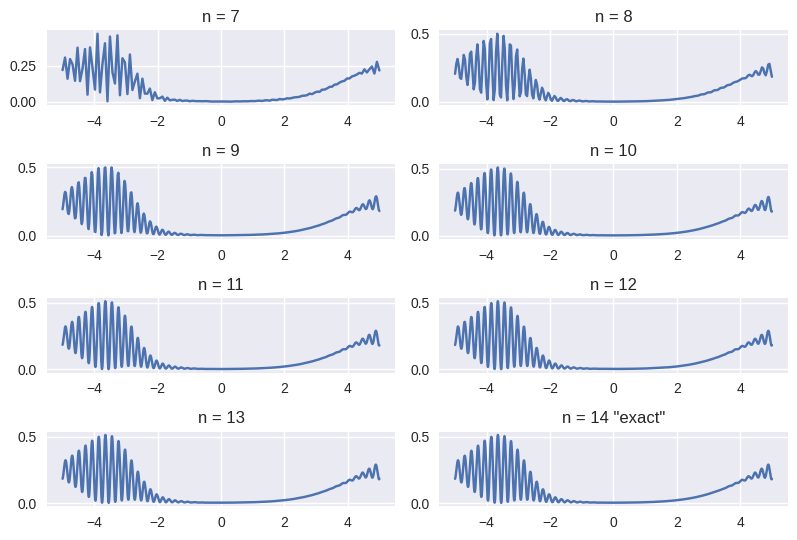

In [6]:
fig, ax = plt.subplots(4, 2)
ax = ax.ravel() 
final_errors = []
for entry, i in zip(final_waves, range(len(final_waves))):
    final_errors.append(np.linalg.norm(entry[::2**i] - true[::2**(n_true - min(n_vals))]))
    x_entry = np.linspace(-5, 5, len(entry))
    ax[i].plot(x_entry, entry)
    ax[i].set_title(f'n = {n_vals[i]}')
x_true = np.linspace(-5, 5, 2**n_true)
ax[-1].plot(x_true, true, label=n_true)
ax[-1].set_title(f'n = {n_true} \"exact\"')
plt.tight_layout()
plt.show()

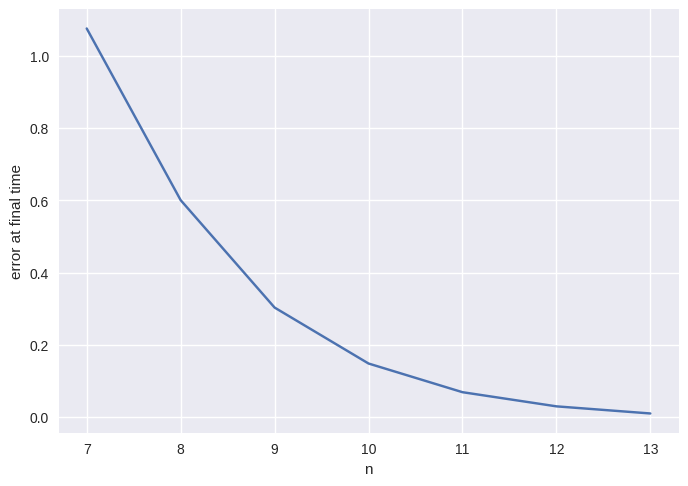

In [7]:
plt.plot(n_vals, final_errors)
plt.xlabel('n')
plt.ylabel('error at final time')
plt.show()

working on time evolution: 100%|██████████| 50/50 [01:26<00:00,  1.74s/it]


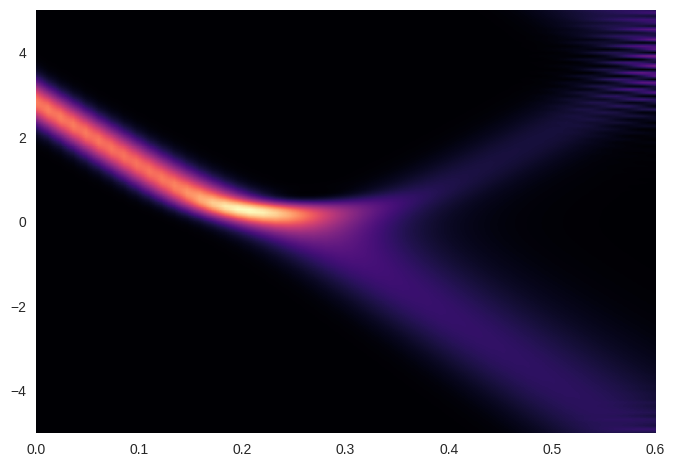

In [8]:
K = 10
amplitudes, t_grid, x_grid = walsh_evolve_quantum(7, 50)
plot_time_evolution(amplitudes, t_grid, x_grid)

In [9]:
n_true = 8
true = time_evolution(n_true, 50)[0][-1, :]
final_waves = []

n_vals, K_vals = [6, 7], [30, 40]
for n, K in zip(n_vals, K_vals):
    amplitudes, t_grid, x_grid = walsh_evolve_quantum(n, K)
    final_waves.append(amplitudes[-1, :])

NameError: name 'time_evolution' is not defined

In [ ]:
final_errors = []
for entry, i in zip(final_waves, range(len(final_waves))):
    final_errors.append(np.linalg.norm(entry[::2**i] - true[::2**(n_true - min(n_vals))]))
    plt.plot(np.linspace(0, 1, len(entry)), entry, label=n_vals[i])
plt.plot(np.linspace(0, 1, 2**n_true), true, label=n_true)
plt.legend()
plt.show()

In [ ]:
plt.plot(n_vals, final_errors)
plt.xlabel('n')
plt.ylabel('error at final time')
plt.show()